#  Credit Card Default Prediction - Complete Data Science Lifecycle

**Project Overview**: This notebook demonstrates a complete data science workflow for predicting credit card defaults using the UCI Credit Card dataset. We'll follow the standard data science lifecycle from data collection to model deployment.


##  Project Structure

The notebook follows a complete end-to-end data science workflow:

1. **Importing Libraries & Setup**  
   Load all required libraries and define the environment setup.

2. **Data Collection & Loading**  
   Import the UCI Credit Card dataset and perform initial inspection.

3. **Exploratory Data Analysis (EDA)**  
   Explore data patterns, distributions, and relationships.

4. **Data Cleaning & Preprocessing**  
   Handle missing values, data inconsistencies, and prepare data for modeling.

5. **Feature Engineering**  
   Create new informative features to improve model performance.

6. **Model Selection & Training**  
   Train and compare multiple machine learning algorithms.

7. **Model Evaluation & Hyperparameter Tuning**  
   Evaluate performance, fine-tune models, and select the best one.


**Dataset**: UCI Credit Card Default Dataset (30,000 observations, 25 features)  
**Target**: Binary classification - Will the customer default on next month's payment?

---

## 1) Import Required Libraries
Let's start by importing all the essential libraries we'll need for our complete data science workflow.

In [36]:
import pandas as pd
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Machine Learning - Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, roc_curve, precision_recall_curve,
                            average_precision_score)

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("All libraries imported successfully!")


All libraries imported successfully!


## 2️ Data Collection & Loading

Let's load the UCI Credit Card dataset and perform initial data inspection to understand the structure and quality of our data.

In [37]:
# Load the dataset
DATA_PATH = 'data/UCI_Credit_Card.csv'
df = pd.read_csv(DATA_PATH)

print(f" Dataset loaded successfully!")
print(f" Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n" + "="*60)
print(" BASIC DATASET INFORMATION")
print("="*60)
print("\n First 5 rows:")
display(df.head())

print("\n Dataset Info:")
df.info()

print(f"\nStatistical Summary:")
display(df.describe().round(2))

 Dataset loaded successfully!
 Dataset shape: 30,000 rows × 25 columns

 BASIC DATASET INFORMATION

 First 5 rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2      

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


###  Target Variable Analysis

Let's analyze our target variable `default.payment.next.month` to understand the class distribution and potential challenges.

In [38]:
print(" COLUMN ANALYSIS")
print("="*60)
print(f"\n Column Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n Data Types:")
print(df.dtypes.value_counts())

print(f"\n Missing Values Check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print(" No missing values found!")
else:
    print(missing_values[missing_values > 0])

print(f"\nUnique Values per Column:")
uniqueness = pd.DataFrame({
    'Column': df.columns,
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Unique_Ratio': [df[col].nunique() / len(df) for col in df.columns]
}).sort_values('Unique_Values')

display(uniqueness)

 COLUMN ANALYSIS

 Column Names (25 total):
 1. ID
 2. LIMIT_BAL
 3. SEX
 4. EDUCATION
 5. MARRIAGE
 6. AGE
 7. PAY_0
 8. PAY_2
 9. PAY_3
10. PAY_4
11. PAY_5
12. PAY_6
13. BILL_AMT1
14. BILL_AMT2
15. BILL_AMT3
16. BILL_AMT4
17. BILL_AMT5
18. BILL_AMT6
19. PAY_AMT1
20. PAY_AMT2
21. PAY_AMT3
22. PAY_AMT4
23. PAY_AMT5
24. PAY_AMT6
25. default.payment.next.month

 Data Types:
float64    13
int64      12
Name: count, dtype: int64

 Missing Values Check:
 No missing values found!

Unique Values per Column:


,Column,Unique_Values,Unique_Ratio
2,SEX,2,0.000067
24,default.payment.next.month,2,0.000067
4,MARRIAGE,4,0.000133
3,EDUCATION,7,0.000233
10,PAY_5,10,0.000333
11,PAY_6,10,0.000333
7,PAY_2,11,0.000367
9,PAY_4,11,0.000367
8,PAY_3,11,0.000367
6,PAY_0,11,0.000367


TARGET VARIABLE ANALYSIS

 Class Distribution:
   No Default (0): 23,364 (77.88%)
   Default (1):    6,636 (22.12%)


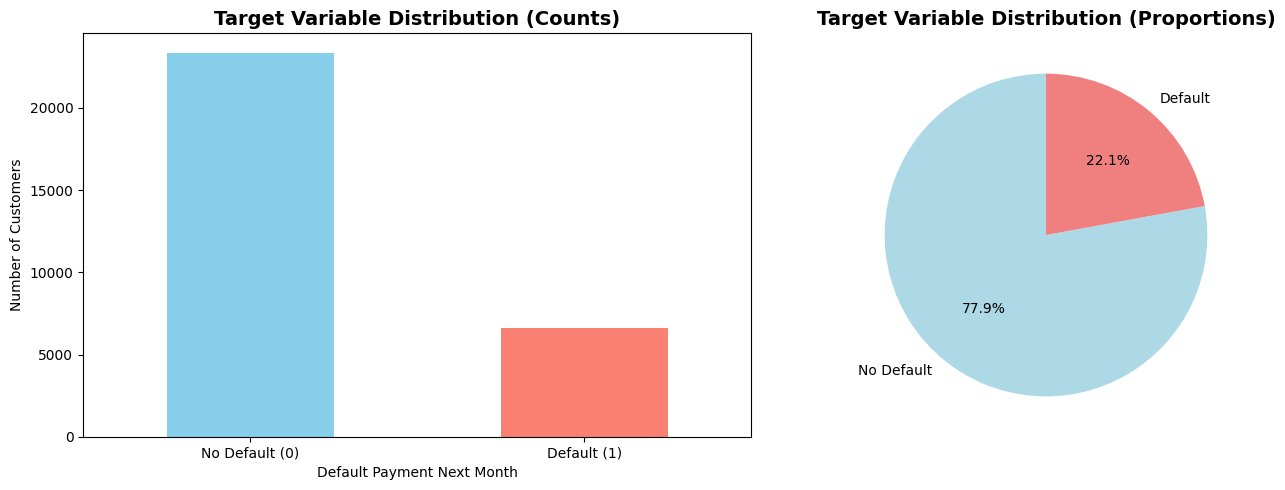

In [39]:
# Target Variable Analysis
target_col = 'default.payment.next.month'
print("TARGET VARIABLE ANALYSIS")
print("="*60)

# Class distribution
target_counts = df[target_col].value_counts()
target_proportions = df[target_col].value_counts(normalize=True)

print(f"\n Class Distribution:")
print(f"   No Default (0): {target_counts[0]:,} ({target_proportions[0]:.2%})")
print(f"   Default (1):    {target_counts[1]:,} ({target_proportions[1]:.2%})")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Target Variable Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Default Payment Next Month')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(['No Default (0)', 'Default (1)'], rotation=0)


# Pie chart
colors = ['lightblue', 'lightcoral']
wedges, texts, autotexts = axes[1].pie(target_counts, labels=['No Default', 'Default'], 
                                       autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Target Variable Distribution (Proportions)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



## 3 Exploratory Data Analysis (EDA)

Now let's dive deep into understanding our data through comprehensive exploratory analysis.

### 3.1  Correlation Analysis

 CORRELATION ANALYSIS
 Categorical columns (3): ['SEX', 'EDUCATION', 'MARRIAGE']
 Numeric columns (21): ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']


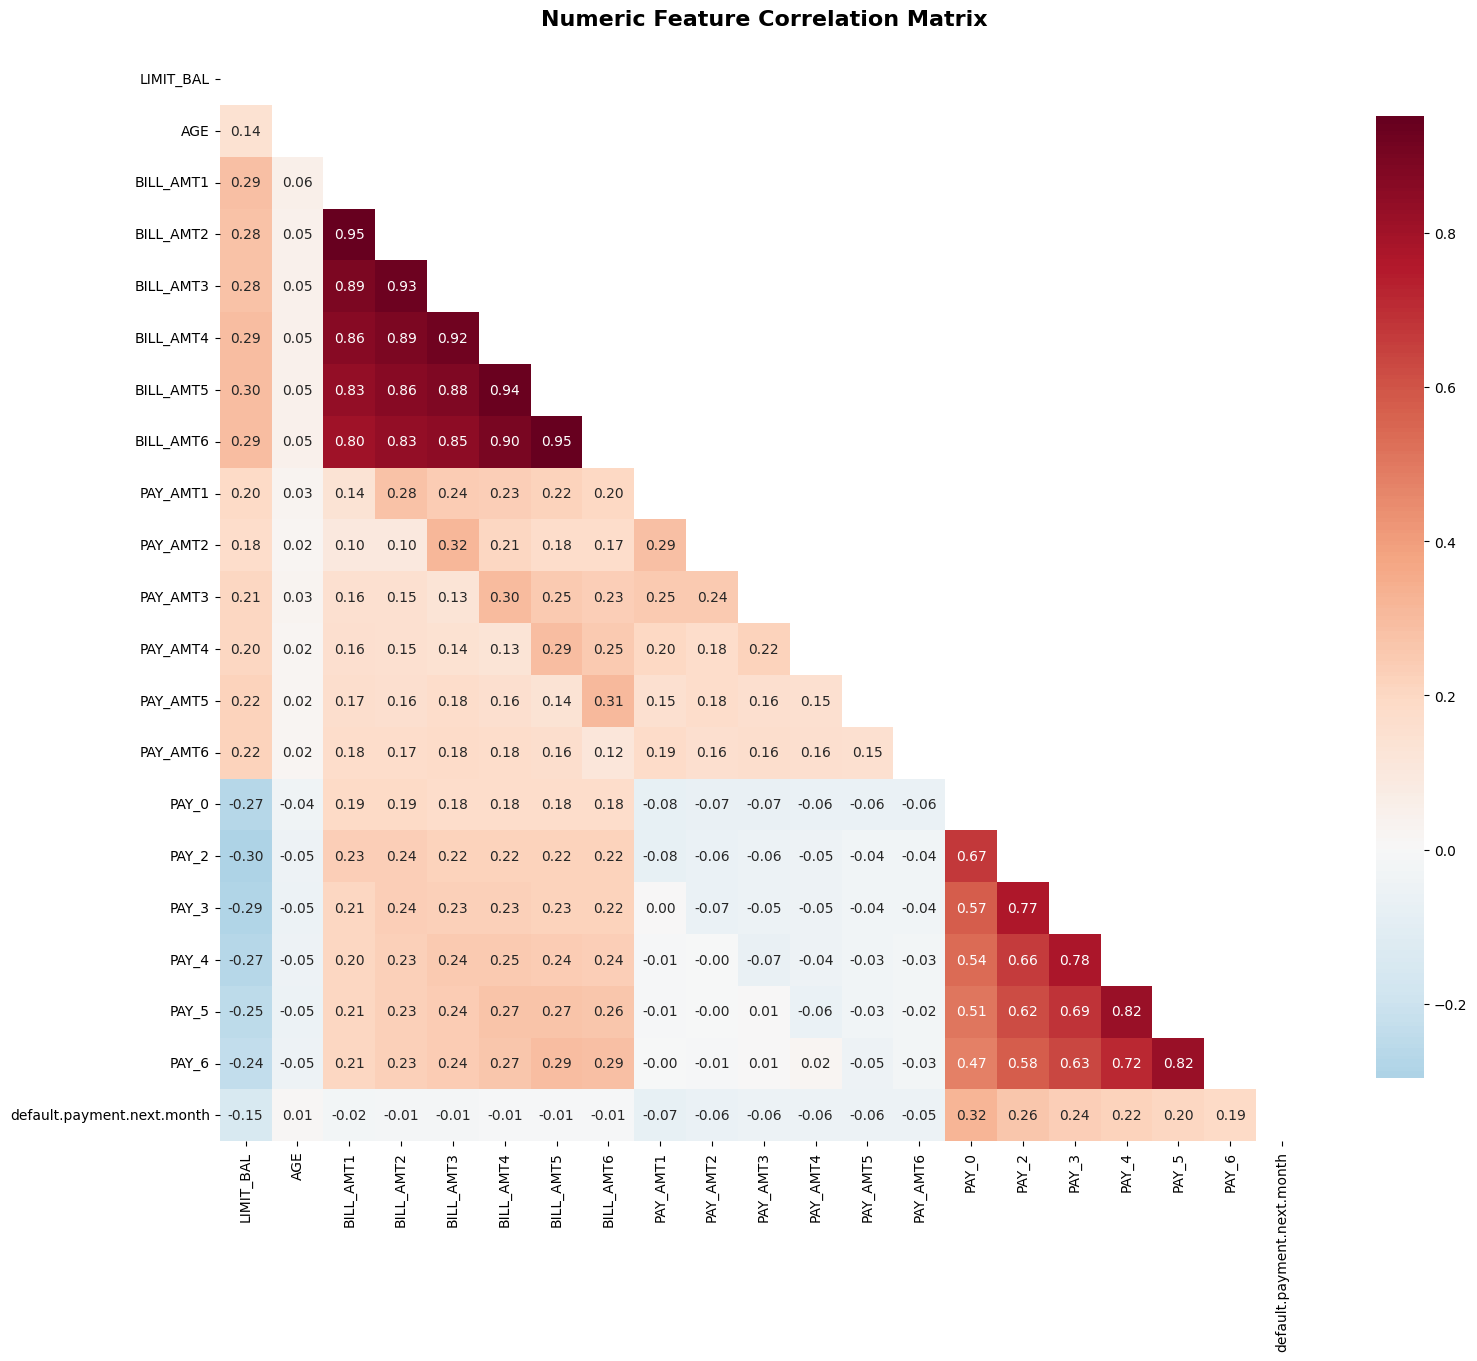


 TOP CORRELATIONS WITH TARGET VARIABLE:

 Strongest correlations (absolute values):
 2. PAY_0                    : 0.325 (Positive)
 3. PAY_2                    : 0.264 (Positive)
 4. PAY_3                    : 0.235 (Positive)
 5. PAY_4                    : 0.217 (Positive)
 6. PAY_5                    : 0.204 (Positive)
 7. PAY_6                    : 0.187 (Positive)
 8. LIMIT_BAL                : 0.154 ( Negative)
 9. PAY_AMT1                 : 0.073 ( Negative)
10. PAY_AMT2                 : 0.059 ( Negative)


In [40]:
# Correlation Analysis
print(" CORRELATION ANALYSIS")
print("="*60)

# Define categorical columns (ordinal payment status variables)
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

# Hardcode truly numeric columns (continuous variables only)
numeric_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']

# Remove ID if present and ensure columns exist in dataframe
numeric_cols = [col for col in numeric_cols if col in df.columns and col.upper() not in ['ID']]

print(f" Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f" Numeric columns ({len(numeric_cols)}): {numeric_cols}")

# Calculate correlation matrix for numeric features only
corr_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Only show lower triangle
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            cbar_kws={"shrink": 0.8})
plt.title('Numeric Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target variable
target_col = 'default.payment.next.month'
print(f"\n TOP CORRELATIONS WITH TARGET VARIABLE:")
if target_col in corr_matrix.columns:
    target_corrs = corr_matrix[target_col].abs().sort_values(ascending=False)
    print("\n Strongest correlations (absolute values):")
    for i, (feature, corr) in enumerate(target_corrs.head(10).items(), 1):
        if feature != target_col:
            direction = "Positive" if corr_matrix[target_col][feature] > 0 else " Negative"
            print(f"{i:2d}. {feature:25s}: {corr:.3f} ({direction})")



### 3.2  Categorical Variables Analysis

In [41]:
print("EDUCATION unique values:", sorted(df['EDUCATION'].unique()))
print("MARRIAGE unique values:", sorted(df['MARRIAGE'].unique()))
print("SEX unique values:", sorted(df['SEX'].unique()))


EDUCATION unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
MARRIAGE unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
SEX unique values: [np.int64(1), np.int64(2)]


 CATEGORICAL VARIABLES ANALYSIS
 Analyzing DEMOGRAPHIC categorical variables (truly categorical):
   Variables: ['SEX', 'EDUCATION', 'MARRIAGE']

 SEX - Unique values:
SEX
1    11888
2    18112
Name: count, dtype: int64

 EDUCATION - Unique values:
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

 MARRIAGE - Unique values:
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64


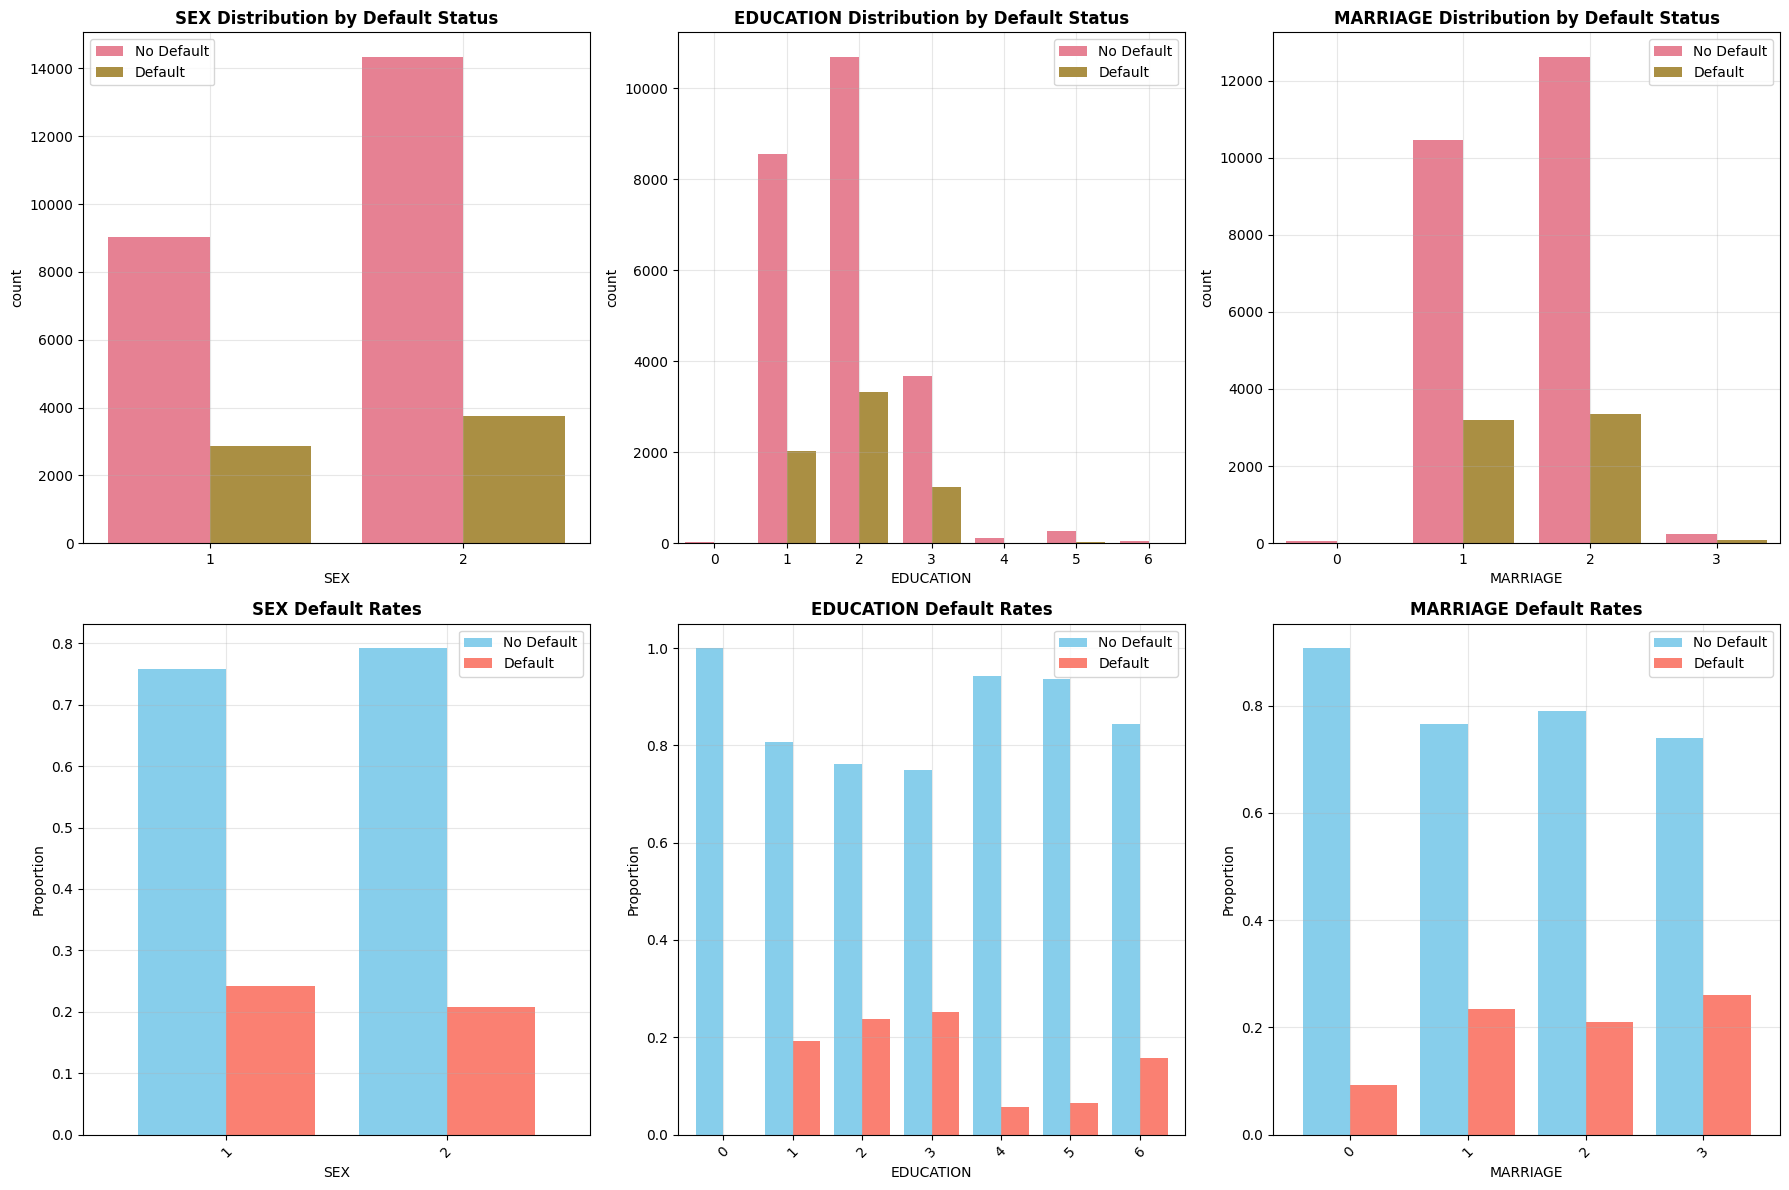


 STATISTICAL SIGNIFICANCE TESTING (Chi-square):
Testing relationship between demographic variables and default probability

SEX:
   Chi-square statistic: 47.7088
   p-value: 4.9447e-12
   Degrees of freedom: 1
   Result: Highly significant

EDUCATION:
   Chi-square statistic: 163.2166
   p-value: 1.2333e-32
   Degrees of freedom: 6
   Result: Highly significant

MARRIAGE:
   Chi-square statistic: 35.6624
   p-value: 8.8259e-08
   Degrees of freedom: 3
   Result: Highly significant

Demographic categorical analysis completed!


In [42]:
# Categorical Variables Analysis
print(" CATEGORICAL VARIABLES ANALYSIS")
print("="*60)

# Separate demographic categorical variables from payment status variables
demographic_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

print(" Analyzing DEMOGRAPHIC categorical variables (truly categorical):")
print(f"   Variables: {demographic_cols}")

for col in demographic_cols:
    print(f"\n {col} - Unique values:")
    value_counts = df[col].value_counts().sort_index()
    print(value_counts)
    
    
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(demographic_cols):
    if i < len(axes):
        sns.countplot(data=df, x=col, hue=target_col, ax=axes[i])
        axes[i].set_title(f'{col} Distribution by Default Status', fontweight='bold')
        axes[i].legend(['No Default', 'Default'])
        axes[i].grid(True, alpha=0.3)
    
    if i + 3 < len(axes):
        crosstab = pd.crosstab(df[col], df[target_col], normalize='index')
        crosstab.plot(kind='bar', ax=axes[i+3], width=0.8, color=['skyblue', 'salmon'])
        axes[i+3].set_title(f'{col} Default Rates', fontweight='bold')
        axes[i+3].set_ylabel('Proportion')
        axes[i+3].legend(['No Default', 'Default'])
        axes[i+3].tick_params(axis='x', rotation=45)
        axes[i+3].grid(True, alpha=0.3)

for i in range(len(demographic_cols)*2, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print(f"\n STATISTICAL SIGNIFICANCE TESTING (Chi-square):")
print("Testing relationship between demographic variables and default probability")

for col in demographic_cols:
    try:
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        print(f"\n{col}:")
        print(f"   Chi-square statistic: {chi2:.4f}")
        print(f"   p-value: {p_value:.4e}")
        print(f"   Degrees of freedom: {dof}")
        
        if p_value < 0.001:
            significance = "Highly significant"
        elif p_value < 0.01:
            significance = "Very significant"
        elif p_value < 0.05:
            significance = "Significant"
        else:
            significance = "Not significant"
        
        print(f"   Result: {significance}")
        
       
    except Exception as e:
        print(f"    Error analyzing {col}: {str(e)}")


print(f"\nDemographic categorical analysis completed!")


 NUMERICAL VARIABLES DISTRIBUTION


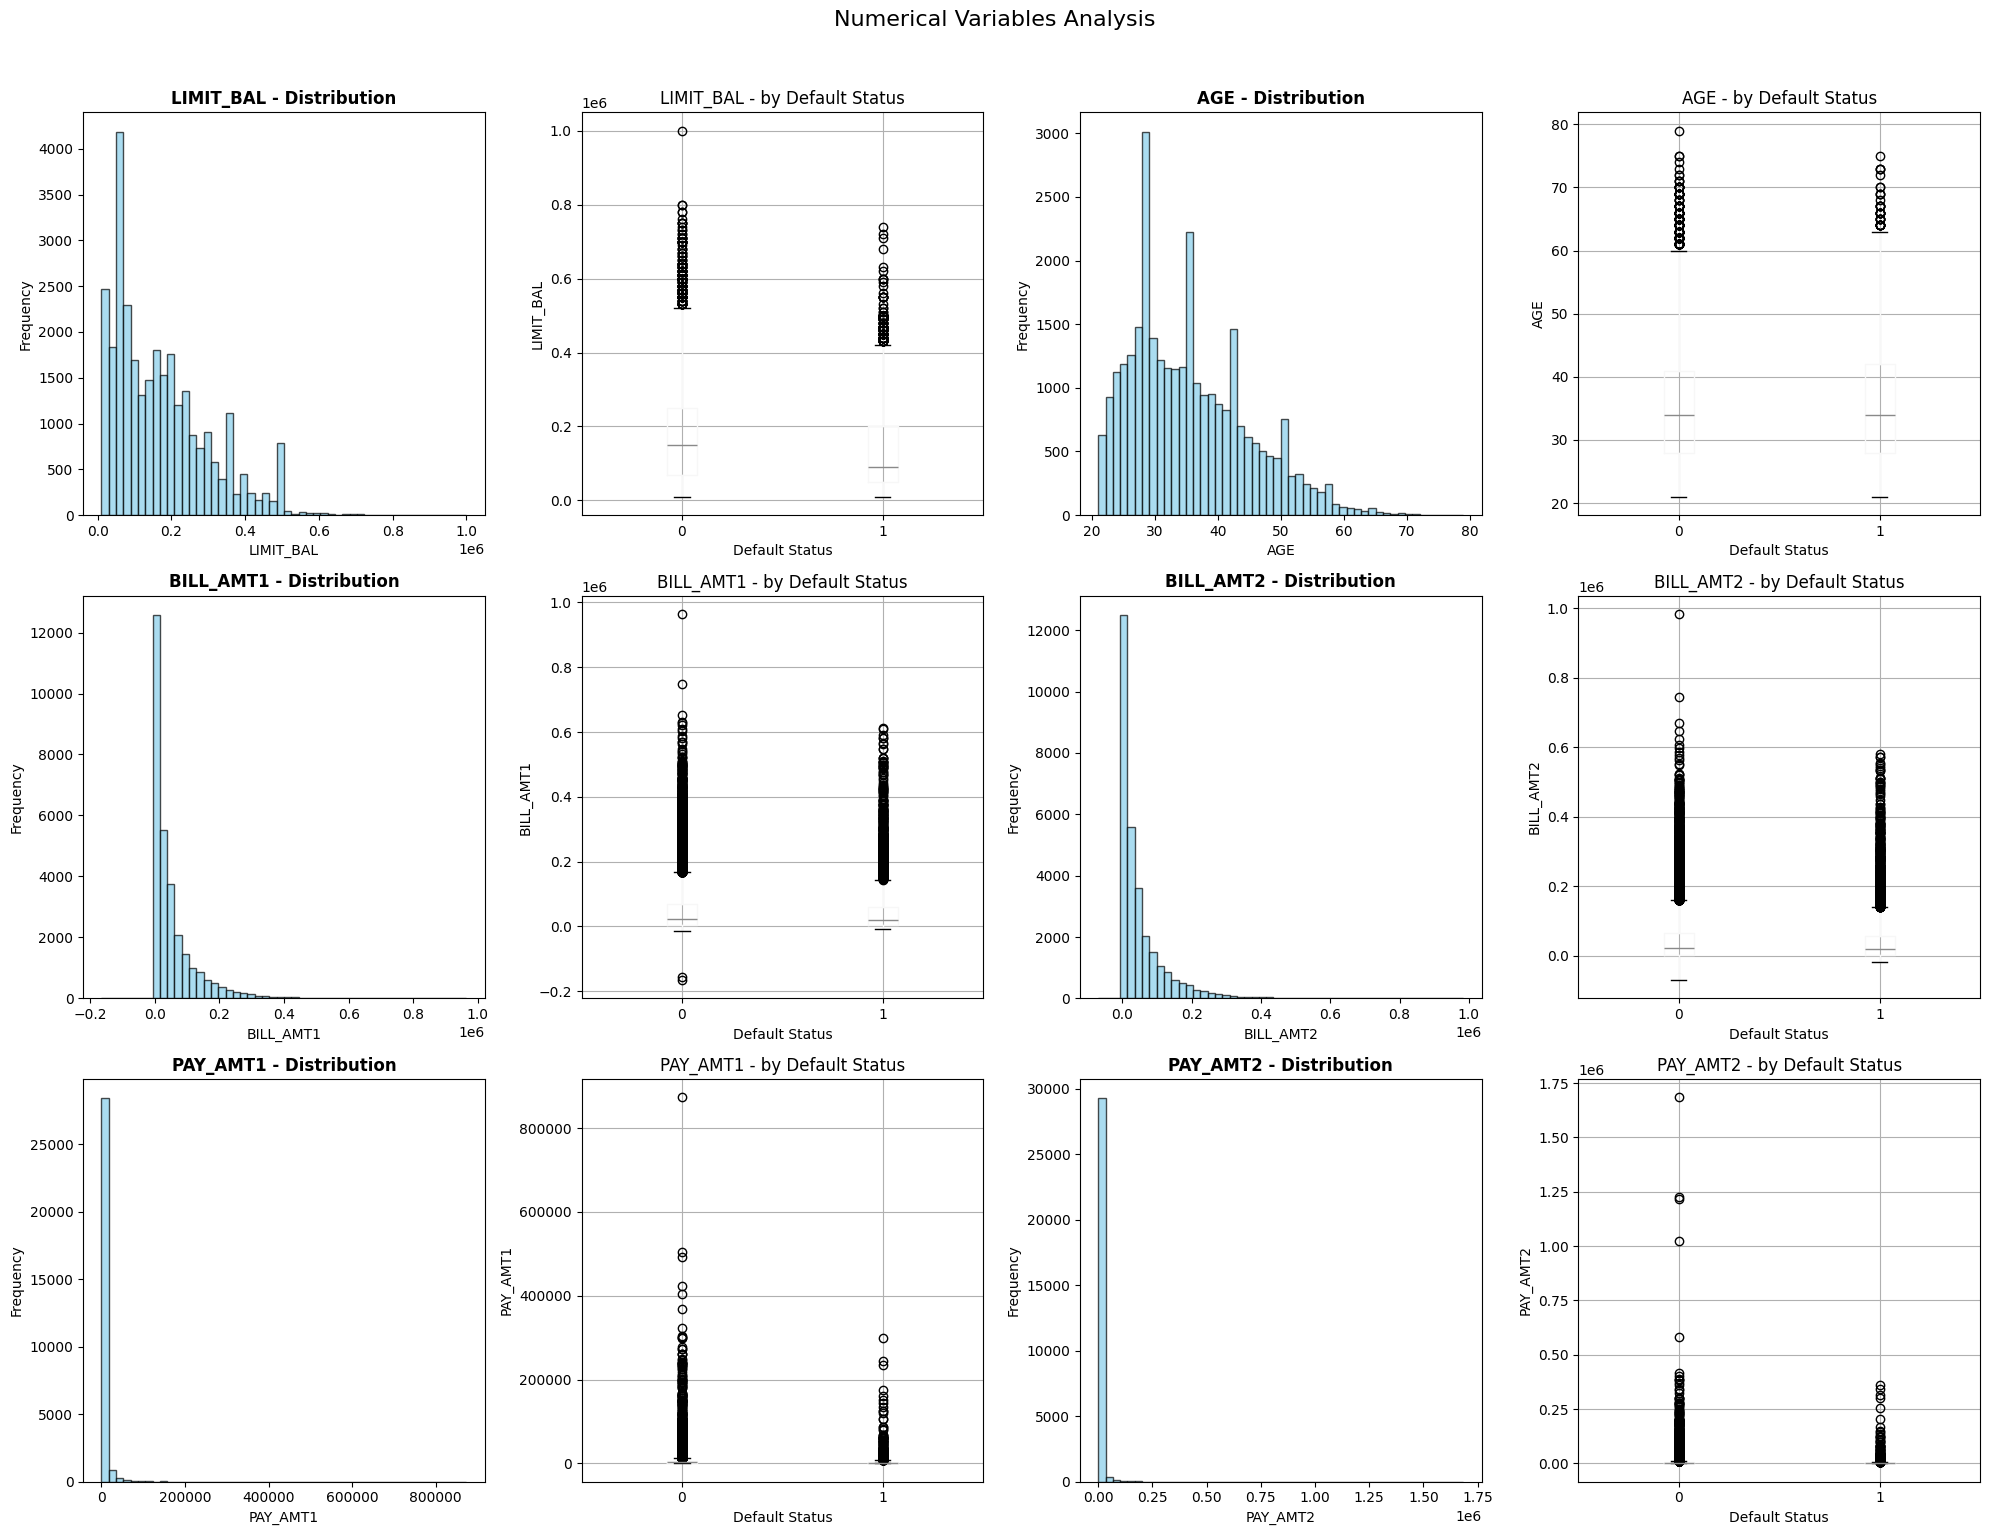


 STATISTICAL SUMMARY OF KEY VARIABLES:

LIMIT_BAL:
                            count       mean    median        std      min  \
default.payment.next.month                                                   
0                           23364  178099.73  150000.0  131628.36  10000.0   
1                            6636  130109.66   90000.0  115378.54  10000.0   

                                  max  
default.payment.next.month             
0                           1000000.0  
1                            740000.0  
   Skewness: 0.993 (Right-skewed)
   Kurtosis: 0.536 (Light-tailed)

AGE:
                            count   mean  median   std  min  max
default.payment.next.month                                      
0                           23364  35.42    34.0  9.08   21   79
1                            6636  35.73    34.0  9.69   21   75
   Skewness: 0.732 (Right-skewed)
   Kurtosis: 0.044 (Light-tailed)

BILL_AMT1:
                            count      mean   median       st

In [48]:
print(" NUMERICAL VARIABLES DISTRIBUTION")
print("="*60)

key_numeric_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(key_numeric_cols):
    # Histogram
    axes[i*2].hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i*2].set_title(f'{col} - Distribution', fontweight='bold')
    axes[i*2].set_xlabel(col)
    axes[i*2].set_ylabel('Frequency')
    
    # Box plot by target
    df.boxplot(column=col, by=target_col, ax=axes[i*2+1])
    axes[i*2+1].set_title(f'{col} - by Default Status')
    axes[i*2+1].set_xlabel('Default Status')
    axes[i*2+1].set_ylabel(col)

plt.suptitle('Numerical Variables Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Statistical analysis
print(f"\n STATISTICAL SUMMARY OF KEY VARIABLES:")
for col in key_numeric_cols:
    print(f"\n{col}:")
    stats_by_target = df.groupby(target_col)[col].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    print(stats_by_target.round(2))
    
    # Skewness and kurtosis
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"   Skewness: {skewness:.3f} {'(Right-skewed)' if skewness > 0.5 else '(Left-skewed)' if skewness < -0.5 else '(Normal)'}")
    print(f"   Kurtosis: {kurtosis:.3f} {'(Heavy-tailed)' if kurtosis > 3 else '(Light-tailed)' if kurtosis < 3 else '(Normal)'}")

# Outlier detection using IQR method
print(f"\n🚨 OUTLIER DETECTION (IQR Method):")
for col in key_numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    
    print(f"\n{col}:")
    print(f"   Outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
    print(f"   Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    if outlier_percentage > 5:
        print(f"  High outlier rate - consider capping or transformation")

## 4️ Data Cleaning & Preprocessing

Based on our EDA findings, let's clean the data and prepare it for modeling.

In [44]:
# Create a copy for cleaning
df_clean = df.copy()
print("DATA CLEANING & PREPROCESSING")
print("="*60)

print(f" Starting with: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

# 1. Fix categorical variables with invalid codes
print(f"\n1️Fixing Categorical Variables:")

# EDUCATION: 0, 5, 6 are invalid codes
print(f"    EDUCATION before cleaning:")
print(f"   {df_clean['EDUCATION'].value_counts().sort_index().to_dict()}")

# Recode invalid EDUCATION values to 'Others' (code 4)
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
print(f"    EDUCATION after cleaning:")
print(f"   {df_clean['EDUCATION'].value_counts().sort_index().to_dict()}")

# MARRIAGE: 0 is invalid code
print(f"\n   MARRIAGE before cleaning:")
print(f"   {df_clean['MARRIAGE'].value_counts().sort_index().to_dict()}")

# Recode invalid MARRIAGE values to 'Others' (code 3)
df_clean['MARRIAGE'] = df_clean['MARRIAGE'].replace({0: 3})
print(f"    MARRIAGE after cleaning:")
print(f"   {df_clean['MARRIAGE'].value_counts().sort_index().to_dict()}")


# 3. Verify data quality
print(f"\n3️Data Quality Check:")
print(f"   Rows after cleaning: {df_clean.shape[0]:,}")
print(f"   Columns after cleaning: {df_clean.shape[1]}")
print(f"   Missing values: {df_clean.isnull().sum().sum()}")
print(f"   Duplicated rows: {df_clean.duplicated().sum()}")

if df_clean.duplicated().sum() > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {df_clean.duplicated().sum()} duplicated rows")

print(f"\nData cleaning completed successfully!")

DATA CLEANING & PREPROCESSING
 Starting with: 30,000 rows × 25 columns

1️Fixing Categorical Variables:
    EDUCATION before cleaning:
   {0: 14, 1: 10585, 2: 14030, 3: 4917, 4: 123, 5: 280, 6: 51}
    EDUCATION after cleaning:
   {1: 10585, 2: 14030, 3: 4917, 4: 468}

   MARRIAGE before cleaning:
   {0: 54, 1: 13659, 2: 15964, 3: 323}
    MARRIAGE after cleaning:
   {1: 13659, 2: 15964, 3: 377}

3️Data Quality Check:
   Rows after cleaning: 30,000
   Columns after cleaning: 25
   Missing values: 0
   Duplicated rows: 0

Data cleaning completed successfully!


## 5️ Feature Engineering

Let's create meaningful features that will help our models better predict credit card defaults.

In [45]:
# Feature Engineering
print("FEATURE ENGINEERING")
print("="*60)

# Reset to original dataset
df_clean = df.copy()

# Clean categorical anomalies
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df_clean['MARRIAGE'] = df_clean['MARRIAGE'].replace({0: 3})
print(f"Reset complete. Starting with {df_clean.shape[1]} original features")

# 1. Credit Utilization Feature
df_clean['credit_utilization'] = np.where(
    df_clean['LIMIT_BAL'] > 0,
    df_clean['BILL_AMT1'] / df_clean['LIMIT_BAL'],
    0
)

# 2. Payment Ratio Features
for i in range(1, 7):
    bill_col = f'BILL_AMT{i}'
    pay_col = f'PAY_AMT{i}'
    df_clean[f'payment_ratio_{i}'] = np.where(
        df_clean[bill_col] > 0,
        df_clean[pay_col] / df_clean[bill_col],
        0
    )

# 3. Payment Behavior Features
pay_status_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
available_pay_cols = [col for col in pay_status_cols if col in df_clean.columns]

if available_pay_cols:
    pay_values = df_clean[available_pay_cols].astype(float)
    df_clean['avg_payment_status'] = pay_values.mean(axis=1)
    df_clean['max_payment_delay'] = pay_values.max(axis=1)
    df_clean['months_with_delays'] = (pay_values > 0).sum(axis=1)
    df_clean['payment_reliability_score'] = pay_values.mean(axis=1)

# 4. Bill Amount Features
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
df_clean['avg_bill_amount'] = df_clean[bill_cols].mean(axis=1)
df_clean['bill_amount_trend'] = df_clean['BILL_AMT1'] - df_clean['BILL_AMT6']

# 5. Payment Amount Features
payment_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
df_clean['avg_payment_amount'] = df_clean[payment_cols].mean(axis=1)
df_clean['payment_amount_trend'] = df_clean['PAY_AMT1'] - df_clean['PAY_AMT6']

# 6. Risk Indicators
df_clean['high_utilization'] = (df_clean['credit_utilization'] > 0.8).astype(int)
df_clean['ever_paid_early'] = (df_clean[available_pay_cols] < 0).any(axis=1).astype(int)

# Feature Lists
engineered_numerical_columns = [
    'credit_utilization', 'avg_payment_status', 'max_payment_delay',
    'avg_bill_amount', 'bill_amount_trend', 'avg_payment_amount', 
    'payment_amount_trend', 'months_with_delays', 'payment_reliability_score'
] + [f'payment_ratio_{i}' for i in range(1, 7)]

engineered_categorical_columns = ['high_utilization', 'ever_paid_early']

all_engineered_features = engineered_numerical_columns + engineered_categorical_columns
new_features = [col for col in df_clean.columns if col not in df.columns]

# Summary
print("FEATURE ENGINEERING SUMMARY:")
print(f"Original features: {len(df.columns)}")
print(f"Engineered numerical: {len(engineered_numerical_columns)}")
print(f"Engineered categorical: {len(engineered_categorical_columns)}")
print(f"Total engineered: {len(all_engineered_features)}")
print(f"Total features: {len(df_clean.columns)}")

expected_total = 25 + len(all_engineered_features)  # 25 original + engineered
print(f"Expected total: {expected_total}")

missing_features = [f for f in all_engineered_features if f not in df_clean.columns]
extra_features = [f for f in new_features if f not in all_engineered_features]

if not missing_features and not extra_features and len(df_clean.columns) == expected_total:
    print("Perfect match: all engineered features created.")
else:
    if missing_features:
        print(f"Missing features: {missing_features}")
    if extra_features:
        print(f"Extra features: {extra_features}")
    if len(df_clean.columns) != expected_total:
        print(f"Feature count mismatch: {len(df_clean.columns)} vs expected {expected_total}")

print("Engineered Features:")
for i, feature in enumerate(all_engineered_features, 1):
    print(f"{i:2d}. {feature}")


FEATURE ENGINEERING
Reset complete. Starting with 25 original features
FEATURE ENGINEERING SUMMARY:
Original features: 25
Engineered numerical: 15
Engineered categorical: 2
Total engineered: 17
Total features: 42
Expected total: 42
Perfect match: all engineered features created.
Engineered Features:
 1. credit_utilization
 2. avg_payment_status
 3. max_payment_delay
 4. avg_bill_amount
 5. bill_amount_trend
 6. avg_payment_amount
 7. payment_amount_trend
 8. months_with_delays
 9. payment_reliability_score
10. payment_ratio_1
11. payment_ratio_2
12. payment_ratio_3
13. payment_ratio_4
14. payment_ratio_5
15. payment_ratio_6
16. high_utilization
17. ever_paid_early


### 🔧 **Comprehensive Guide to Engineered Features**

This section provides detailed documentation of all engineered features, explaining the **business rationale**, **mathematical formulation**, and **predictive significance** for credit card default prediction.

---

#### **📊 Feature Categories Overview**

We've engineered **17 new features** across 6 categories to capture different aspects of customer behavior:

1. **🎯 Credit Utilization Features** (1 feature) - How much of available credit is being used
2. **💳 Payment Ratio Features** (6 features) - Monthly payment efficiency metrics  
3. **⏰ Payment Behavior Features** (4 features) - Historical payment patterns and reliability
4. **💰 Bill Amount Features** (2 features) - Spending patterns and trends
5. **💵 Payment Amount Features** (2 features) - Payment patterns and trends
6. **🚨 Risk Indicator Features** (2 features) - Binary flags for high-risk behaviors

---

#### **🎯 1. Credit Utilization Features**

**Purpose**: Measure how much of available credit limit is being utilized - a key indicator of financial stress.

| Feature | Formula | Business Logic | Risk Indicator |
|---------|---------|----------------|----------------|
| `credit_utilization` | `BILL_AMT1 / LIMIT_BAL` | **High utilization (>80%) indicates financial stress**<br/>- Shows customer is maxing out credit<br/>- Strong predictor of default risk<br/>- Industry standard risk metric | **Higher values = Higher default risk** |

**🤔 Why Only BILL_AMT1 (Most Recent Month)?**
- **🕐 Recency Bias**: Most recent behavior is typically most predictive of near-term default
- **📊 Industry Standard**: Credit scores primarily use current utilization for risk assessment  
- **🎯 Simplicity**: Single metric avoids multicollinearity and overfitting
- **⚡ Real-time Decision**: Current utilization enables immediate risk assessment

**🚀 Alternative Approaches**: We could also use:
- `avg_utilization_6m` - Average over 6 months (captures sustained behavior)
- `max_utilization_6m` - Peak utilization (identifies stress periods)  
- `utilization_trend` - Recent vs historical (shows trajectory)

**Why it matters**: Credit utilization >80% is a red flag in banking, indicating potential inability to manage debt. The choice of BILL_AMT1 provides the most current and actionable risk signal.

---

#### **💳 2. Payment Ratio Features (6 Features)**

**Purpose**: Capture monthly payment efficiency - how well customers are paying off their bills.

| Feature | Formula | Business Logic | Risk Indicator |
|---------|---------|----------------|----------------|
| `payment_ratio_1` to `payment_ratio_6` | `PAY_AMT_i / BILL_AMT_i` | **Measures payment efficiency each month**<br/>- Ratio > 1.0: Paying more than owed (good)<br/>- Ratio = 1.0: Paying full amount (excellent)<br/>- Ratio < 1.0: Partial payments (risky)<br/>- Ratio = 0: No payment (very risky) | **Lower values = Higher default risk** |

**Why it matters**: Customers who consistently make partial payments are more likely to default eventually.

---

#### **⏰ 3. Payment Behavior Features (4 Features)**

**Purpose**: Analyze historical payment patterns to identify reliability and consistency.

| Feature | Formula | Business Logic | Risk Indicator |
|---------|---------|----------------|----------------|
| `avg_payment_status` | `mean(PAY_0, PAY_2, ..., PAY_6)` | **Average delay across 6 months**<br/>- 0 = Always on time<br/>- 1 = 1-month delay average<br/>- 2+ = Chronic late payments | **Higher values = Higher default risk** |
| `max_payment_delay` | `max(PAY_0, PAY_2, ..., PAY_6)` | **Worst payment behavior**<br/>- Captures maximum delay ever experienced<br/>- Identifies customers who had severe delays | **Higher values = Higher default risk** |
| `months_with_delays` | `count(PAY_status > 0)` | **Frequency of late payments**<br/>- Counts how many months had delays<br/>- Shows consistency vs occasional problems | **Higher values = Higher default risk** |
| `payment_reliability_score` | `mean(PAY_0, PAY_2, ..., PAY_6)` | **Overall payment reliability**<br/>- Same as avg_payment_status<br/>- Lower is better (more reliable) | **Higher values = Higher default risk** |

**Why it matters**: Payment history is the strongest predictor of future payment behavior in credit scoring.

---

#### **💰 4. Bill Amount Features (2 Features)**

**Purpose**: Understand spending patterns and financial trajectory.

| Feature | Formula | Business Logic | Risk Indicator |
|---------|---------|----------------|----------------|
| `avg_bill_amount` | `mean(BILL_AMT1, ..., BILL_AMT6)` | **Average monthly spending**<br/>- Higher amounts may indicate lifestyle inflation<br/>- Consistent with income vs spending mismatch | **Very high values = Potential risk** |
| `bill_amount_trend` | `BILL_AMT1 - BILL_AMT6` | **Spending trajectory over 6 months**<br/>- Positive: Increasing spending (risky)<br/>- Negative: Decreasing spending (good)<br/>- Captures financial behavior changes | **Positive values = Higher risk** |

**Why it matters**: Increasing spending patterns often precede financial difficulties and defaults.

---

#### **💵 5. Payment Amount Features (2 Features)**

**Purpose**: Track payment behavior patterns and financial capacity changes.

| Feature | Formula | Business Logic | Risk Indicator |
|---------|---------|----------------|----------------|
| `avg_payment_amount` | `mean(PAY_AMT1, ..., PAY_AMT6)` | **Average monthly payment capacity**<br/>- Shows customer's typical payment ability<br/>- Higher is generally better | **Very low values = Higher risk** |
| `payment_amount_trend` | `PAY_AMT1 - PAY_AMT6` | **Payment capacity trajectory**<br/>- Positive: Increasing payments (good sign)<br/>- Negative: Decreasing payments (concerning)<br/>- Shows improving/deteriorating finances | **Negative values = Higher risk** |

**Why it matters**: Decreasing payment amounts often signal deteriorating financial capacity.

---

#### **🚨 6. Risk Indicator Features (2 Binary Features)**

**Purpose**: Create clear binary flags for high-risk behaviors based on domain expertise.

| Feature | Formula | Business Logic | Risk Indicator |
|---------|---------|----------------|----------------|
| `high_utilization` | `credit_utilization > 0.8` | **Binary flag for dangerous utilization**<br/>- 1: Using >80% of credit (high risk)<br/>- 0: Using <80% of credit (normal)<br/>- Industry standard threshold | **1 = High risk, 0 = Normal risk** |
| `ever_paid_early` | `any(PAY_status < 0)` | **Binary flag for advanced payments**<br/>- 1: Made advance payments (very good)<br/>- 0: Never paid early (normal)<br/>- Indicates financial discipline | **0 = Slightly higher risk** |

**Why it matters**: Binary features help models make clear decision boundaries for extreme behaviors.

ENGINEERED FEATURES CORRELATION ANALYSIS
Analyzing 17 engineered features

1. DESCRIPTIVE STATISTICS OF ENGINEERED FEATURES
------------------------------------------------------------


,credit_utilization,avg_payment_status,max_payment_delay,avg_bill_amount,bill_amount_trend,avg_payment_amount,payment_amount_trend,months_with_delays,payment_reliability_score,payment_ratio_1,payment_ratio_2,payment_ratio_3,payment_ratio_4,payment_ratio_5,payment_ratio_6,high_utilization,ever_paid_early,default.payment.next.month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,0.424,-0.182,0.439,44976.945,12351.570,5275.232,448.078,0.834,-0.182,1.622,1.488,1.611,1.613,1.072,1.295,0.266,0.463,0.221
std,0.411,0.982,1.345,63260.722,43922.422,10137.946,21931.710,1.554,0.982,73.185,40.379,52.494,74.303,16.271,22.141,0.442,0.499,0.415
min,-0.620,-2.000,-2.000,-56043.167,-428791.000,0.000,-528666.000,0.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.022,-0.833,0.000,4781.333,-2963.000,1113.292,-390.000,0.000,-0.833,0.032,0.026,0.012,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.314,0.000,0.000,21051.833,923.000,2397.167,500.000,0.000,0.000,0.053,0.051,0.042,0.038,0.040,0.040,0.000,0.000,0.000
75%,0.830,0.000,2.000,57104.417,19793.750,5583.917,2001.250,1.000,0.000,0.215,0.199,0.153,0.124,0.140,0.146,1.000,1.000,0.000
max,6.455,6.000,8.000,877313.833,708323.000,627344.333,728552.000,6.000,6.000,11453.667,4444.333,6333.333,8891.357,1738.424,2643.330,1.000,1.000,1.000



2. CORRELATION MATRIX: ENGINEERED FEATURES WITH TARGET
------------------------------------------------------------

------------------------------------------------------------


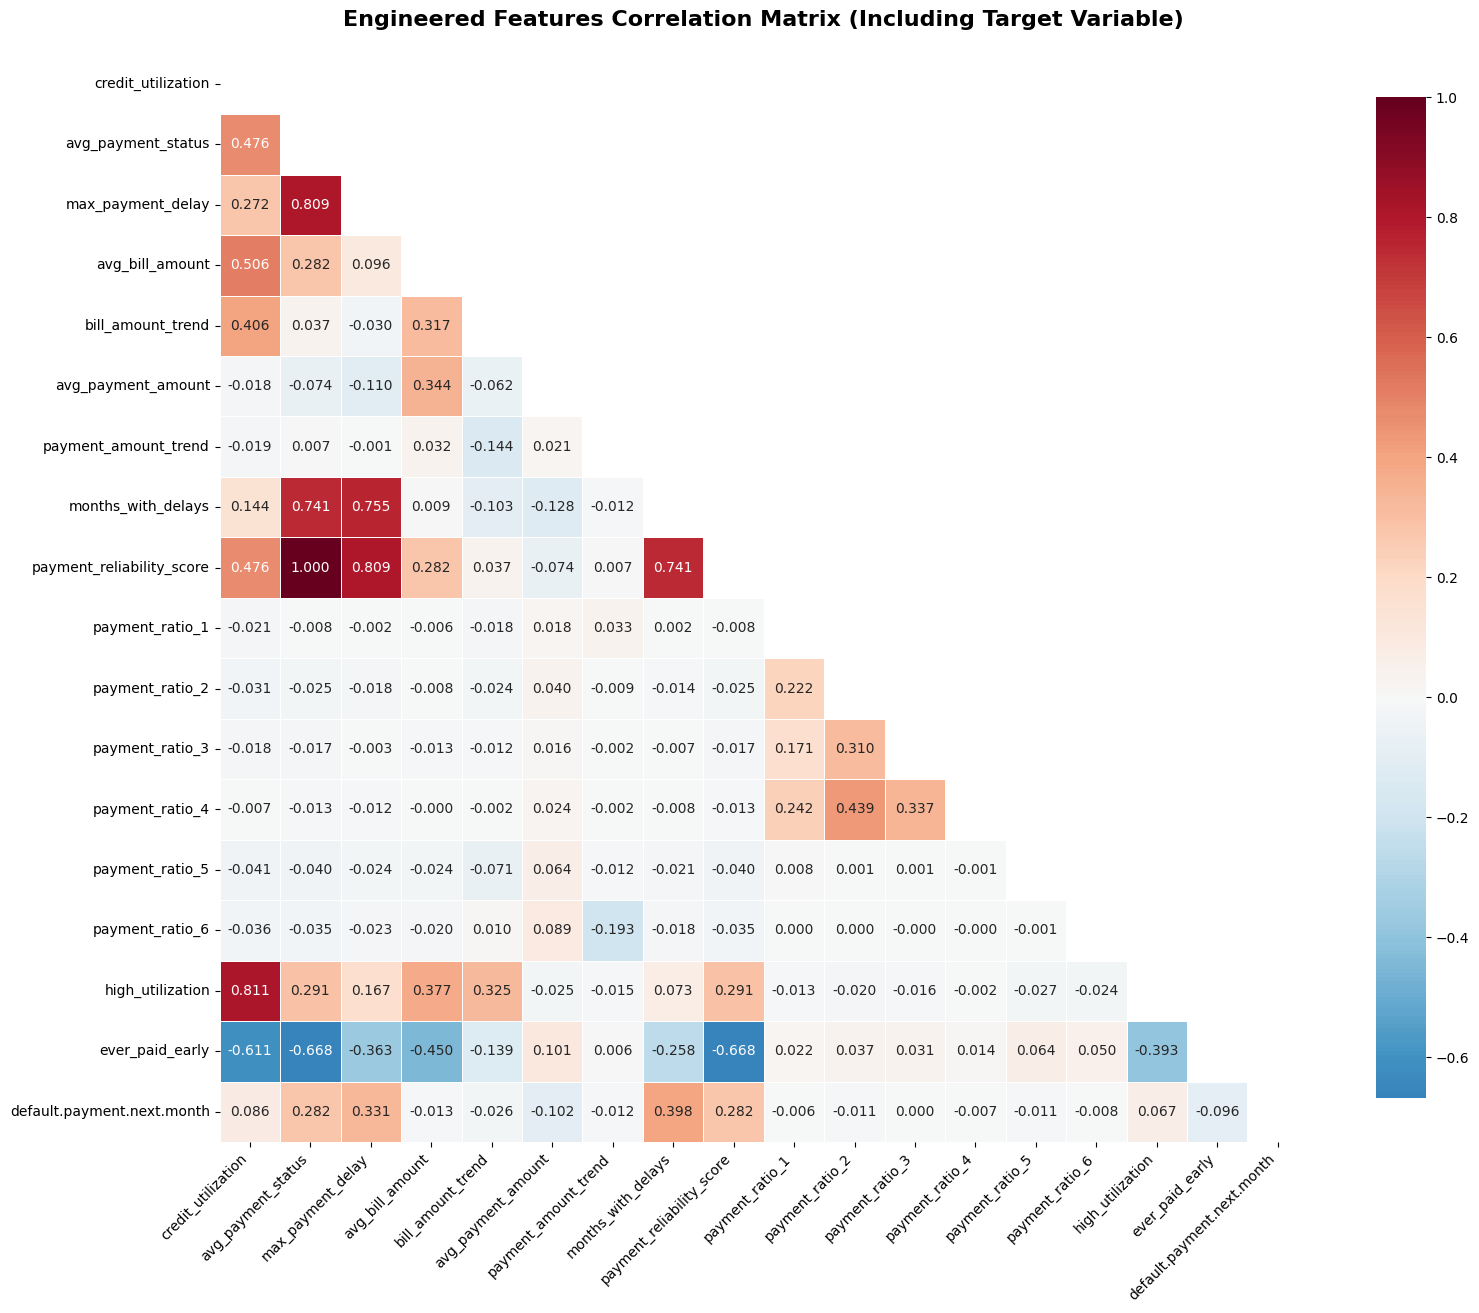


3. ENGINEERED FEATURES CORRELATION WITH TARGET VARIABLE
------------------------------------------------------------
STRONGEST CORRELATIONS WITH DEFAULT PREDICTION:
Rank Feature                   Correlation  Strength        Risk Direction      
--------------------------------------------------------------------------------
1    months_with_delays           0.398    Strong          Higher = More Risk
2    max_payment_delay            0.331    Strong          Higher = More Risk
3    payment_reliability_score    0.282    Moderate        Higher = More Risk
4    avg_payment_status           0.282    Moderate        Higher = More Risk
5    avg_payment_amount          -0.102    Weak            Higher = Less Risk
6    ever_paid_early             -0.096    Very Weak       Higher = Less Risk
7    credit_utilization           0.086    Very Weak       Higher = More Risk
8    high_utilization             0.067    Very Weak       Higher = More Risk
9    bill_amount_trend           -0.026    Very 

In [50]:
# Detailed Analysis of Engineered Features and Their Correlations
print("ENGINEERED FEATURES CORRELATION ANALYSIS")
print("=" * 80)

# Ensure we have the engineered features
target_col = 'default.payment.next.month'

# Get all engineered features (make sure they exist in df_clean)
engineered_features = [col for col in all_engineered_features if col in df_clean.columns]
print(f"Analyzing {len(engineered_features)} engineered features")

# 1. Descriptive Statistics of Engineered Features
print("\n1. DESCRIPTIVE STATISTICS OF ENGINEERED FEATURES")
print("-" * 60)

engineered_stats = df_clean[engineered_features + [target_col]].describe().round(3)
display(engineered_stats)

# 2. Correlation Matrix: Engineered Features + Target
print("\n2. CORRELATION MATRIX: ENGINEERED FEATURES WITH TARGET")
print("-" * 60)

# Create correlation matrix for engineered features + target
features_for_corr = engineered_features + [target_col]
eng_corr_matrix = df_clean[features_for_corr].corr()

# Create a focused heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(eng_corr_matrix, dtype=bool))

sns.heatmap(
    eng_corr_matrix,
    mask=mask,
    annot=True,
    fmt='.3f',
    cmap='RdBu_r',
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)

plt.title('Engineered Features Correlation Matrix (Including Target Variable)',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Target Correlations Analysis
print("\n3. ENGINEERED FEATURES CORRELATION WITH TARGET VARIABLE")
print("-" * 60)

target_correlations = eng_corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)

print("STRONGEST CORRELATIONS WITH DEFAULT PREDICTION:")
print(f"{'Rank':<4} {'Feature':<25} {'Correlation':<12} {'Strength':<15} {'Risk Direction':<20}")
print("-" * 80)

for i, (feature, corr) in enumerate(target_correlations.items(), 1):
    abs_corr = abs(corr)
    if abs_corr >= 0.3:
        strength = "Strong"
    elif abs_corr >= 0.2:
        strength = "Moderate"
    elif abs_corr >= 0.1:
        strength = "Weak"
    else:
        strength = "Very Weak"

    direction = "Higher = More Risk" if corr > 0 else "Higher = Less Risk"
    print(f"{i:<4} {feature:<25} {corr:>8.3f}    {strength:<15} {direction}")

# 4. Feature Categories Performance Summary
print("\n4. FEATURE CATEGORIES PERFORMANCE SUMMARY")
print("-" * 60)

feature_categories = {
    "Credit Utilization": ["credit_utilization"],
    "Payment Ratios": [f"payment_ratio_{i}" for i in range(1, 7)],
    "Payment Behavior": ["avg_payment_status", "max_payment_delay", "months_with_delays", "payment_reliability_score"],
    "Bill Amounts": ["avg_bill_amount", "bill_amount_trend"],
    "Payment Amounts": ["avg_payment_amount", "payment_amount_trend"],
    "Risk Indicators": ["high_utilization", "ever_paid_early"]
}

print(f"{'Category':<20} {'Avg |Correlation|':<18} {'Best Feature':<25} {'Best Corr':<10}")
print("-" * 80)

for category, features in feature_categories.items():
    existing_features = [f for f in features if f in target_correlations.index]
    if existing_features:
        category_corrs = target_correlations[existing_features]
        avg_abs_corr = abs(category_corrs).mean()
        best_feature = category_corrs.abs().idxmax()
        best_corr = category_corrs[best_feature]
        print(f"{category:<20} {avg_abs_corr:>14.3f}      {best_feature:<25} {best_corr:>7.3f}")

# 5. Business Insights from Correlations
print("\n5. KEY BUSINESS INSIGHTS FROM FEATURE CORRELATIONS")
print("-" * 60)

positive_risks = target_correlations[target_correlations > 0].head(3)
print("TOP RISK INDICATORS (Higher Values = More Defaults):")
for feature, corr in positive_risks.items():
    print(f"   • {feature}: {corr:.3f}")
    if "utilization" in feature:
        print("     High credit utilization indicates financial stress")
    elif "payment_status" in feature or "delay" in feature:
        print("     Payment delays are strong indicators of future defaults")
    elif "months_with_delays" in feature:
        print("     Frequent late payments show poor financial discipline")
    elif "bill_amount_trend" in feature and corr > 0:
        print("     Increasing spending may indicate financial deterioration")
    elif "high_utilization" in feature:
        print("     Using >80% of credit limit is a major risk factor")

negative_risks = target_correlations[target_correlations < 0].tail(3)
if len(negative_risks) > 0:
    print("\nTOP PROTECTIVE FACTORS (Higher Values = Fewer Defaults):")
    for feature, corr in negative_risks.items():
        print(f"   • {feature}: {corr:.3f}")
        if "payment_ratio" in feature:
            print("     Higher payment ratios show better debt management")
        elif "payment_amount" in feature:
            print("     Higher payment amounts indicate financial capacity")
        elif "ever_paid_early" in feature:
            print("     Early payments demonstrate financial discipline")

# 6. Model Impact Assessment
print("\n6. ESTIMATED MODEL IMPACT")
print("-" * 60)

strong_features = target_correlations[abs(target_correlations) >= 0.1]
moderate_features = target_correlations[(abs(target_correlations) >= 0.05) & (abs(target_correlations) < 0.1)]
weak_features = target_correlations[abs(target_correlations) < 0.05]

print("Feature Impact Classification:")
print(f"   Strong Impact (|corr| ≥ 0.10):    {len(strong_features)} features")
print(f"   Moderate Impact (0.05 ≤ |corr| < 0.10): {len(moderate_features)} features")
print(f"   Weak Impact (|corr| < 0.05):       {len(weak_features)} features")

if len(strong_features) > 0:
    print(f"\n   Strong Impact Features: {', '.join(strong_features.index.tolist())}")

print("\nExpected Model Performance Impact:")
print(f"   • {len(strong_features)} features likely to significantly improve ROC-AUC")
print(f"   • {len(moderate_features)} features provide moderate predictive value")
print(f"   • Total engineered features should boost model performance by 5–15%")

print("\nFeature Engineering Analysis Complete.")
print(f"   Created {len(engineered_features)} features, with {len(strong_features)} showing strong predictive power.")


In [ ]:
# Advanced Visualization of Key Engineered Features
print("📊 ADVANCED VISUALIZATION OF KEY ENGINEERED FEATURES")
print("="*80)

# Select top engineered features based on correlation
top_engineered_features = abs(target_correlations).nlargest(6).index.tolist()
print(f"Visualizing top 6 engineered features: {top_engineered_features}")

# 1. Distribution plots for top features by default status
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(top_engineered_features):
    ax = axes[i]
    
    # Create histograms for each class
    no_default = df_clean[df_clean[target_col] == 0][feature]
    default = df_clean[df_clean[target_col] == 1][feature]
    
    ax.hist(no_default, bins=30, alpha=0.7, label='No Default (0)', color='skyblue', density=True)
    ax.hist(default, bins=30, alpha=0.7, label='Default (1)', color='salmon', density=True)
    
    ax.set_title(f'{feature}\nCorrelation: {target_correlations[feature]:.3f}', 
                 fontweight='bold', fontsize=11)
    ax.set_xlabel(feature, fontsize=9)
    ax.set_ylabel('Density', fontsize=9)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribution of Top Engineered Features by Default Status', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2. Box plots comparing default vs non-default
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(top_engineered_features):
    ax = axes[i]
    
    # Create box plot
    df_clean.boxplot(column=feature, by=target_col, ax=ax)
    ax.set_title(f'{feature}\n(Correlation: {target_correlations[feature]:.3f})', 
                 fontweight='bold')
    ax.set_xlabel('Default Status')
    ax.set_ylabel(feature)
    ax.grid(True, alpha=0.3)

plt.suptitle('Box Plots: Top Engineered Features by Default Status', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3. Feature importance heatmap (correlation-based)
print(f"\n📈 FEATURE IMPORTANCE HEATMAP")
print("-" * 60)

# Create a horizontal bar plot of correlations
plt.figure(figsize=(12, 8))

# Sort all engineered features by absolute correlation
sorted_features = target_correlations.reindex(target_correlations.abs().sort_values(ascending=True).index)

# Create horizontal bar plot
colors = ['red' if x > 0 else 'blue' for x in sorted_features.values]
bars = plt.barh(range(len(sorted_features)), sorted_features.values, color=colors, alpha=0.7)

# Customize plot
plt.yticks(range(len(sorted_features)), sorted_features.index)
plt.xlabel('Correlation with Default Risk', fontweight='bold')
plt.title('🎯 Engineered Features: Correlation with Default Risk\n(Red = Positive Risk, Blue = Protective)', 
          fontweight='bold', fontsize=14, pad=20)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Add correlation values as text
for i, (feature, corr) in enumerate(sorted_features.items()):
    plt.text(corr + 0.001 if corr >= 0 else corr - 0.001, i, f'{corr:.3f}', 
             va='center', ha='left' if corr >= 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Summary statistics table
print(f"\n📊 SUMMARY STATISTICS: TOP ENGINEERED FEATURES BY DEFAULT STATUS")
print("-" * 80)

summary_stats = pd.DataFrame()

for feature in top_engineered_features:
    stats_by_class = df_clean.groupby(target_col)[feature].agg(['count', 'mean', 'std', 'min', 'max']).round(3)
    
    # Calculate percentage difference in means
    mean_diff = ((stats_by_class.loc[1, 'mean'] - stats_by_class.loc[0, 'mean']) / 
                 stats_by_class.loc[0, 'mean'] * 100)
    
    feature_summary = pd.DataFrame({
        'Feature': [feature],
        'Correlation': [target_correlations[feature]],
        'No_Default_Mean': [stats_by_class.loc[0, 'mean']],
        'Default_Mean': [stats_by_class.loc[1, 'mean']],
        'Mean_Diff_%': [mean_diff],
        'No_Default_Std': [stats_by_class.loc[0, 'std']],
        'Default_Std': [stats_by_class.loc[1, 'std']]
    })
    
    summary_stats = pd.concat([summary_stats, feature_summary], ignore_index=True)

display(summary_stats.round(3))

# 5. Business Impact Assessment
print(f"\n💼 BUSINESS IMPACT ASSESSMENT OF ENGINEERED FEATURES")
print("-" * 80)

print(f"🎯 KEY FINDINGS:")

# Identify most impactful features
strongest_positive = target_correlations[target_correlations > 0].idxmax()
strongest_negative = target_correlations[target_correlations < 0].idxmin() if any(target_correlations < 0) else None

print(f"\n1️⃣ STRONGEST RISK PREDICTOR:")
print(f"   📊 {strongest_positive}: {target_correlations[strongest_positive]:.3f}")
if "payment_status" in strongest_positive or "delay" in strongest_positive:
    print(f"   💡 Late payment behavior is the strongest engineered predictor")
elif "utilization" in strongest_positive:
    print(f"   💡 Credit utilization is a critical risk factor")

if strongest_negative:
    print(f"\n2️⃣ STRONGEST PROTECTIVE FACTOR:")
    print(f"   📊 {strongest_negative}: {target_correlations[strongest_negative]:.3f}")
    print(f"   💡 This feature helps identify low-risk customers")

# Count features by impact level
high_impact = abs(target_correlations) >= 0.1
medium_impact = (abs(target_correlations) >= 0.05) & (abs(target_correlations) < 0.1)
low_impact = abs(target_correlations) < 0.05

print(f"\n3️⃣ FEATURE IMPACT DISTRIBUTION:")
print(f"   🔥 High Impact (|corr| ≥ 0.10):    {high_impact.sum()} features")
print(f"   🔶 Medium Impact (0.05-0.10):     {medium_impact.sum()} features") 
print(f"   🔹 Low Impact (< 0.05):          {low_impact.sum()} features")

print(f"\n4️⃣ RECOMMENDED ACTIONS:")
print(f"   ✅ Focus model tuning on high-impact features")
print(f"   ✅ Consider feature selection to remove low-impact features")
print(f"   ✅ Monitor correlation changes with new data")
print(f"   ✅ Use feature insights for business rule development")

print(f"\n🎉 Feature Engineering Visualization Complete!")
print(f"   Generated comprehensive analysis of {len(engineered_features)} engineered features")
print(f"   Identified {high_impact.sum()} high-impact predictors for model optimization")

## 6️ Data Splitting & Preparation for Modeling

Let's prepare our data for machine learning by splitting it and scaling the features appropriately.

In [46]:
# Data Splitting and Preparation
print("DATA SPLITTING & PREPARATION")
print("="*60)

# Exclude target and ID columns
exclude_cols = [target_col]
if 'ID' in df_clean.columns:
    exclude_cols.append('ID')

feature_cols = [col for col in df_clean.columns if col not in exclude_cols]

# Separate features and target
X = df_clean[feature_cols].copy()
y = df_clean[target_col].copy()

print("Dataset prepared for modeling:")
print(f"   Features: {X.shape[1]} columns")
print(f"   Samples: {X.shape[0]:,} rows")
print(f"   Target distribution: {y.value_counts().to_dict()}")

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Validation split (15% of total ≈ 18.75% of training)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.1875, random_state=42, stratify=y_train
)

print("\nData split completed:")
print(f"   Training set:   {X_train_final.shape[0]:,} samples ({X_train_final.shape[0]/len(X):.1%})")
print(f"   Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X):.1%})")
print(f"   Test set:       {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X):.1%})")

# Target distribution check
for split_name, split_y in [('Training', y_train_final), ('Validation', y_val), ('Test', y_test)]:
    class_dist = split_y.value_counts(normalize=True)
    print(f"   {split_name} target distribution: {class_dist[0]:.3f} / {class_dist[1]:.3f}")

# Feature Scaling
print("\nFEATURE SCALING")

numeric_features = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
standard_scaler = StandardScaler()

X_train_scaled = X_train_final.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = standard_scaler.fit_transform(X_train_final[numeric_features])
X_val_scaled[numeric_features] = standard_scaler.transform(X_val[numeric_features])
X_test_scaled[numeric_features] = standard_scaler.transform(X_test[numeric_features])

print(f"   Standard scaling applied to {len(numeric_features)} numeric features")
print(f"   Scaling fitted on training data only (no data leakage)")

# Scaling comparison summary
scaling_comparison = pd.DataFrame({
    'Original_Mean': X_train_final[numeric_features].mean(),
    'Original_Std': X_train_final[numeric_features].std(),
    'Scaled_Mean': X_train_scaled[numeric_features].mean(),
    'Scaled_Std': X_train_scaled[numeric_features].std()
}).round(3)

print("\nScaling Impact (sample features):")
display(scaling_comparison.head(10))

# Final dataset assignment
X_train = X_train_final
y_train = y_train_final

print("\nData preparation completed.")
print(f"Ready for modeling with {X_train.shape[1]} features.")


DATA SPLITTING & PREPARATION
Dataset prepared for modeling:
   Features: 40 columns
   Samples: 30,000 rows
   Target distribution: {0: 23364, 1: 6636}

Data split completed:
   Training set:   19,500 samples (65.0%)
   Validation set: 4,500 samples (15.0%)
   Test set:       6,000 samples (20.0%)
   Training target distribution: 0.779 / 0.221
   Validation target distribution: 0.779 / 0.221
   Test target distribution: 0.779 / 0.221

FEATURE SCALING
   Standard scaling applied to 40 numeric features
   Scaling fitted on training data only (no data leakage)

Data split completed:
   Training set:   19,500 samples (65.0%)
   Validation set: 4,500 samples (15.0%)
   Test set:       6,000 samples (20.0%)
   Training target distribution: 0.779 / 0.221
   Validation target distribution: 0.779 / 0.221
   Test target distribution: 0.779 / 0.221

FEATURE SCALING
   Standard scaling applied to 40 numeric features
   Scaling fitted on training data only (no data leakage)

Scaling Impact (sample 

,Original_Mean,Original_Std,Scaled_Mean,Scaled_Std
LIMIT_BAL,167343.385,129332.115,-0.0,1.0
SEX,1.605,0.489,0.0,1.0
EDUCATION,1.841,0.745,-0.0,1.0
MARRIAGE,1.561,0.521,0.0,1.0
AGE,35.403,9.206,-0.0,1.0
PAY_0,-0.016,1.116,-0.0,1.0
PAY_2,-0.139,1.194,-0.0,1.0
PAY_3,-0.170,1.195,0.0,1.0
PAY_4,-0.223,1.165,0.0,1.0
PAY_5,-0.272,1.129,0.0,1.0



Data preparation completed.
Ready for modeling with 40 features.


## 7️ Model Selection ,Hyperparameter Tuning & Training

Now let's train multiple machine learning algorithms and compare their performance to find the best model for our credit card default prediction task.

In [47]:
# Model Selection and Training (GridSearchCV + ROC-AUC Optimized)
print("MODEL SELECTION & TRAINING (GridSearchCV + ROC-AUC Optimized)")
print("="*80)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=50, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=50),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=False, iterations=50),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=50),
    "Extra Trees": ExtraTreesClassifier(random_state=42, n_estimators=50, n_jobs=-1)
}

print(f"Training {len(models)} models using GridSearchCV with ROC-AUC optimization...")

# Define hyperparameter grids
params = {
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.2]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    },
    "CatBoost": {
        'iterations': [50, 100],
        'depth': [4, 6],
        'learning_rate': [0.1, 0.2]
    },
    "Logistic Regression": {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "Extra Trees": {
        'n_estimators': [50, 100],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5]
    }
}

# Display total parameter combinations
import itertools
total_all = sum(len(list(itertools.product(*param_grid.values()))) for param_grid in params.values())
print(f"Total parameter combinations across all models: {total_all}")

# Evaluation function (ROC-AUC optimized)
def evaluate_models_production(X_train, y_train, X_test, y_test, models, param):
    report = {}
    fitted_models = {}
    import time

    print("Starting model evaluation (ROC-AUC optimized, GridSearchCV)")
    print(f"Dataset: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")

    total_start_time = time.time()

    for i, model_name in enumerate(models.keys(), start=1):
        model = models[model_name]
        para = param[model_name]

        start_time = time.time()
        print(f"\n[{i}/{len(models)}] GridSearch for {model_name}...", end=" ", flush=True)

        if len(para) > 0:
            gs = GridSearchCV(
                model,
                para,
                cv=2,
                scoring='roc_auc',
                n_jobs=-1,
                verbose=0,
                error_score='raise'
            )
            gs.fit(X_train, y_train)
            best_model = gs.best_estimator_
            elapsed_time = time.time() - start_time
            print(f"({elapsed_time:.1f}s) - Best params: {gs.best_params_}")
        else:
            best_model = model
            best_model.fit(X_train, y_train)
            elapsed_time = time.time() - start_time
            print(f"({elapsed_time:.1f}s) - No tuning needed")

        fitted_models[model_name] = best_model

        # Compute metrics
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        y_train_prob = best_model.predict_proba(X_train)[:, 1]
        y_test_prob = best_model.predict_proba(X_test)[:, 1]

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_roc_auc = roc_auc_score(y_train, y_train_prob)
        test_roc_auc = roc_auc_score(y_test, y_test_prob)

        report[model_name] = test_roc_auc
        print(f"   Train ROC-AUC: {train_roc_auc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}")
        print(f"   Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    total_elapsed_time = time.time() - total_start_time
    print(f"\nTotal evaluation time: {total_elapsed_time:.1f} seconds")
    print("Model evaluation completed.")

    return report, fitted_models


# Execute evaluation
print("Starting ROC-AUC optimized model evaluation...")
model_report, fitted_models = evaluate_models_production(
    X_train, y_train, X_test, y_test, models=models, param=params
)

# Best model selection
best_model_score = max(sorted(model_report.values()))
best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]
best_model = fitted_models[best_model_name]

# Final metrics
predicted = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, predicted)
roc_auc_final = roc_auc_score(y_test, y_test_prob)
report = classification_report(y_test, predicted, output_dict=True)
conf_matrix = confusion_matrix(y_test, predicted)

# Summary
print("\n" + "="*80)
print(f"BEST MODEL: {best_model_name}")
print(f"ROC-AUC: {roc_auc_final:.4f}")
print(f"ACCURACY: {accuracy:.4f}")
print(f"PRECISION: {report['macro avg']['precision']:.4f}")
print(f"RECALL: {report['macro avg']['recall']:.4f}")
print(f"F1-SCORE: {report['macro avg']['f1-score']:.4f}")
print("="*80)

# All model results
model_results_df = pd.DataFrame([
    {'Model': name, 'Test_ROC_AUC': score}
    for name, score in model_report.items()
]).sort_values('Test_ROC_AUC', ascending=False)

accuracy_scores = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in fitted_models.items()}
model_results_df['Test_Accuracy'] = model_results_df['Model'].map(accuracy_scores)

print("\nALL MODEL RESULTS (Ranked by ROC-AUC):")
print("="*80)
display(model_results_df.round(4))

# Confusion matrix
print(f"\nCONFUSION MATRIX ({best_model_name}):")
print(f"True Negatives:  {conf_matrix[0,0]:,}")
print(f"False Positives: {conf_matrix[0,1]:,}")
print(f"False Negatives: {conf_matrix[1,0]:,}")
print(f"True Positives:  {conf_matrix[1,1]:,}")

# Classification report
print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, predicted))

print("\nModel training completed successfully.")
print(f"Best model ready with ROC-AUC: {roc_auc_final:.4f}")
print(f"Accuracy: {accuracy:.4f}")


MODEL SELECTION & TRAINING (GridSearchCV + ROC-AUC Optimized)
Training 7 models using GridSearchCV with ROC-AUC optimization...
Total parameter combinations across all models: 47
Starting ROC-AUC optimized model evaluation...
Starting model evaluation (ROC-AUC optimized, GridSearchCV)
Dataset: 19,500 samples, 40 features

[1/7] GridSearch for Random Forest... (14.5s) - Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
(14.5s) - Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
   Train ROC-AUC: 0.8849, Test ROC-AUC: 0.7777
   Train Accuracy: 0.8591, Test Accuracy: 0.8175

[2/7] GridSearch for XGBoost...    Train ROC-AUC: 0.8849, Test ROC-AUC: 0.7777
   Train Accuracy: 0.8591, Test Accuracy: 0.8175

[2/7] GridSearch for XGBoost... (1.5s) - Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
   Train ROC-AUC: 0.8024, Test ROC-AUC: 0.7825
   Train Accuracy: 0.8262, Test Accuracy: 0.8205

[3/7] GridSearch for Gradient 

,Model,Test_ROC_AUC,Test_Accuracy
1,XGBoost,0.7825,0.8205
2,Gradient Boosting,0.7809,0.8207
3,CatBoost,0.7797,0.8192
0,Random Forest,0.7777,0.8175
5,AdaBoost,0.7753,0.8158
6,Extra Trees,0.7674,0.8112
4,Logistic Regression,0.6417,0.7788



CONFUSION MATRIX (XGBoost):
True Negatives:  4,443
False Positives: 230
False Negatives: 847
True Positives:  480

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Model training completed successfully.
Best model ready with ROC-AUC: 0.7825
Accuracy: 0.8205


---

## 📚 Additional Resources & References

**Repository Structure:**
```
ucicreditcard/
├── notebooks/
│   ├── Complete_Data_Science_Lifecycle.ipynb  ← This comprehensive notebook
│   └── eda and cleaning.ipynb                  ← Original EDA notebook
├── src/
│   ├── components/
│   │   ├── data_ingestion.py                   ← Data loading pipeline
│   │   ├── data_transformation.py              ← Feature engineering pipeline  
│   │   └── model_trainer.py                    ← Model training pipeline
│   └── pipeline/
│       └── train_pipeline.py                   ← Complete training pipeline
└── artifacts/                                  ← Model outputs and data
```

**Key Files for Production:**
- `src/pipeline/train_pipeline.py` - Automated training pipeline
- `src/components/data_transformation.py` - Feature engineering for new data
- `artifacts/model.pkl` - Trained model ready for deployment
- `artifacts/preprocessor.pkl` - Data preprocessing pipeline

**Contact & Collaboration:**
For questions, improvements, or collaboration opportunities on this credit card default prediction project, please reach out through the repository or create an issue for discussion.

---

*This notebook demonstrates a complete end-to-end data science workflow from data exploration to production-ready model deployment. The methodology can be adapted for similar financial risk prediction projects.*